# Download the hurricaneMichael.csv and US_states(5m).json files (Links to an external site.) for this assignment.

Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.

Upload your notebook to Github and submit the URL for this assignment.

Tips

After loading the US_states(5m).json file as a geodataframe, use the following code to create a geodataframe that only contains the contiguous United States (48 states):

map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

The longitude column data should be turned into negative values(data source listed longitude direction instead of positive/negative). Use the following code to make the data correct:

michaeldf['Long'] = 0 - michaeldf['Long']

Feel free to add any additional features to your plot (marker shape, marker color, etc.)


In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt
import json
import numpy as np

import dateutil.parser as dparser
from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
#dataset of addresses in Finland
location = "datasets/US_states(5m).json"

#load data into geo dataframe
map_df = gpd.read_file(location)
    
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [3]:
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]
# List includes Washington DC so there are 49
len(map48)

49

In [4]:
type(map48)

geopandas.geodataframe.GeoDataFrame

In [5]:
map48.columns

Index(['GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry'], dtype='object')

In [6]:
map48['NAME']

0                  Alabama
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
37                  Oregon
38            Pennsylvania
3

In [7]:
# Now the hurricane file
michaeldf = pd.read_csv('datasets/hurricaneMichael.csv')
michaeldf.head()


,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [8]:
# COnvert Long to negative values
michaeldf['Long'] = 0 - michaeldf['Long']
michaeldf.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [9]:
michaeldf.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [10]:
# Both of these show 45 rows
print(len(michaeldf))
michaeldf['Name'].count()

45


45

In [11]:
# Only get rows where Date not null
michaeldf = michaeldf.loc[michaeldf['Date'].notnull()]

In [12]:
# Still have 45 rows
print(len(michaeldf))

45


In [13]:
# NO Need to change Date object to a string
#michaeldf['Date'] = michaeldf['Date'].astype(str)

# Parse Date column to get year - never used
yearList = []
idx = int(0)
while idx < len(michaeldf):
    ret = dparser.parse(michaeldf['Date'][idx],fuzzy=True, dayfirst=False)    
    yearList.append(ret.year)
    idx = idx + 1

# Add a year column for no good reason
michaeldf['Year'] = yearList

In [14]:
michaeldf.columns

Index(['AdvisoryNumber', 'Date', 'Lat', 'Long', 'Wind', 'Pres', 'Movement',
       'Type', 'Name', 'Received', 'Forecaster', 'Year'],
      dtype='object')

In [15]:
# Make a new column (list) for coordinates data
michaeldf['coordinates'] = list(michaeldf[['Long', 'Lat']].values)

In [16]:
michaeldf.columns

Index(['AdvisoryNumber', 'Date', 'Lat', 'Long', 'Wind', 'Pres', 'Movement',
       'Type', 'Name', 'Received', 'Forecaster', 'Year', 'coordinates'],
      dtype='object')

In [17]:
michaeldf.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
Year                int64
coordinates        object
dtype: object

In [18]:
michaeldf['coordinates'][0]

array([-86.6,  18. ])

In [19]:
michaeldf.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Year,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,2018,"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,2018,"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,2018,"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,2018,"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,2018,"[-86.9, 18.6]"


In [20]:
# Apply Point to coordinates
michaeldf['coordinates'] = michaeldf['coordinates'].apply(Point)

In [21]:
# GeoPandas implements two main data structures, a GeoSeries and a GeoDataFrame. 
# These are subclasses of pandas Series and DataFrame, respectively.
map_michael_geodf = gpd.GeoDataFrame(michaeldf, geometry='coordinates')

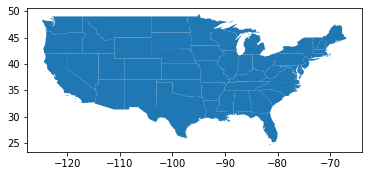

In [23]:
# Plot of all the states
map48.plot()

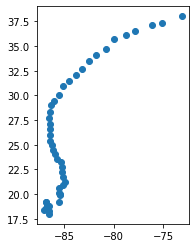

In [24]:
# Plot of the hurricane
map_michael_geodf.plot()

In [25]:
# geometry column data
print("The geometry column is '{}'\nIt contains the following GeoSeries:".format(map_michael_geodf.geometry.name))
map_michael_geodf.geometry

The geometry column is 'coordinates'
It contains the following GeoSeries:


0       POINT (-86.59999999999999 18)
1     POINT (-86.59999999999999 18.3)
2     POINT (-86.59999999999999 18.8)
3     POINT (-87.09999999999999 18.4)
4     POINT (-86.90000000000001 18.6)
5                  POINT (-86.8 18.9)
6     POINT (-86.90000000000001 19.2)
7     POINT (-86.90000000000001 19.2)
8                  POINT (-85.5 19.2)
9     POINT (-85.40000000000001 19.9)
10      POINT (-85.40000000000001 20)
11                 POINT (-85.5 20.1)
12                 POINT (-85.5 20.6)
13    POINT (-85.09999999999999 20.9)
14    POINT (-84.90000000000001 21.2)
15    POINT (-85.09999999999999 21.7)
16                 POINT (-85.2 22.2)
17                 POINT (-85.2 22.7)
18                 POINT (-85.3 23.2)
19                 POINT (-85.7 23.6)
20    POINT (-85.90000000000001 24.1)
21    POINT (-86.09999999999999 24.5)
22                   POINT (-86.2 25)
23    POINT (-86.40000000000001 25.4)
24      POINT (-86.40000000000001 26)
25                 POINT (-86.5 26.6)
26          

Text(0.5, 1, 'Hurricane Michael Track')

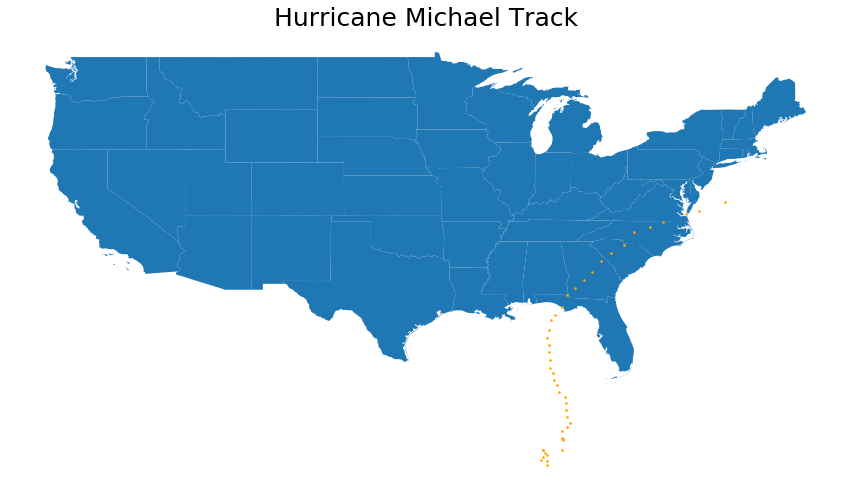

In [26]:
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
map_michael_geodf.plot(ax=basemap, color='orange', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael Track", fontsize=25, fontweight=3)